**SET 1**

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as smf
import warnings
warnings.filterwarnings('ignore')


In [20]:
name_of_company=pd.Series(['Allied Signal',' Bankers Trust','General Mills','ITT Industries','J.P.Morgan & Co','Lehman Brothers','Marriott','MCI','Merrill Lynch','Microsoft','Morgan Stanley','Sun Microsystems','Travelers','US Airways','Warner-Lambert'])
measure_x=pd.Series([24.23,25.53,25.41,24.14,29.62,28.25,25.81,24.39,40.26,32.95,91.36,25.99,39.42,26.71,35.00])


In [21]:
measure_x.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15 entries, 0 to 14
Series name: None
Non-Null Count  Dtype  
--------------  -----  
15 non-null     float64
dtypes: float64(1)
memory usage: 248.0 bytes


<Axes: >

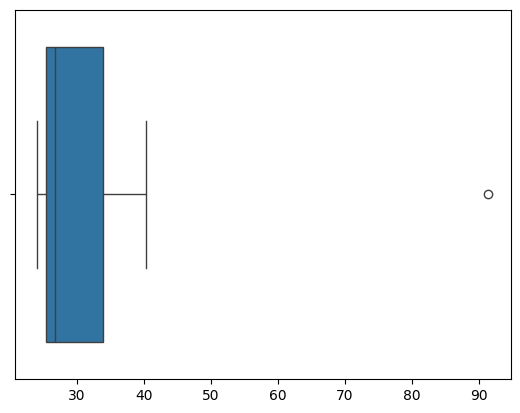

In [22]:
#Finding outliers
sns.boxplot(measure_x,orient='h')
#From boxplot we can see Outlier is present at 90% around.So Morgan Stanley with 91.36% is the Outlier.

In [23]:
#Finding Mean(𝜇),Standard Deviation(𝜎),Variance(𝜎2)
#Mean(𝜇)
print("Mean(𝜇)=",measure_x.mean())
print("Standard Deviation(𝜎)=",measure_x.std())
print("Variance(𝜎2)=",measure_x.var())

Mean(𝜇)= 33.27133333333333
Standard Deviation(𝜎)= 16.945400921222028
Variance(𝜎2)= 287.1466123809524


**SET-2**

1.The time required for servicing transmissions is normally distributed with (µ) = 45 minutes and (σ) = 8 minutes. The service manager plans to have work begin on the transmission of a customer’s car 10 minutes after the car is dropped off and the customer is told that the car will be ready within 1 hour from drop-off. What is the probability that the service manager cannot meet his commitment?

In [24]:
from scipy import stats
from scipy.stats import norm
import numpy as np

In [25]:
# Finding Z-Score at X=50; Z = (X - µ)/σ
Z=(50-45)/8
Z


0.625

In [26]:
# Finding probability P(X>50) = 1-stats.norm.cdf(z_score)
round(1-stats.norm.cdf(0.625),3)*100

26.6

2.The current age (in years) of 400 clerical employees at an insurance claims processing center is normally distributed with mean µ = 38 and Standard deviation σ =6. For each statement below, please specify True/False. If false, briefly explain why. A. More employees at the processing center are older than 44 than between 38 and 44. B. A training program for employees under the age of 30 at the center would be expected to attract about 36 employees

In [27]:
# A. More employees at the processing center are older than 44 than between 38 and 44.

# P(X>44); Employees older than 44 yrs of age
round(1-stats.norm.cdf(44,38,6),3)*100

15.9

In [28]:
# P(38<X<44); Employees between 38 to 44 yrs of age
round((stats.norm.cdf(44,38,6)-stats.norm.cdf(38,38,6)),3)*100

34.1

In [29]:
# B. A training program for employees under the age of 30 at the center would be expected to attract about 36 employees.

# P(X<30);Probability of employees under 30 yrs of age
round(stats.norm.cdf(30,38,6),3)*100

9.1

In [30]:

# No. of employees attending training program from 400 employees. is given as N*P(X<30)
400*stats.norm.cdf(30,38,6)

36.484487890347154

4.Let X ~ N(100, 202). Find two values, a and b, symmetric about the mean, such that the probability of the random variable taking a value between them is 0.99.

In [31]:
# Given
mew = 100
std = 20
# p(a<x<b)
#To Find =
""" two values, a and b, symmetric about the mean, such that the
probability of the random variable taking a value between them is 0.99"""
# Solution
""" From the above details,we have to exclude .005% area from each
left and right tails. Hence, we want to find the .005th and the
.995th percentiles Z score values"""

# Z value for .005 percentiles
z_005_ = np.round(stats.norm.ppf(0.005),4)
z_005_

# Z value for .99 percentiles
z_99_ = np.round(stats.norm.ppf(0.995),4)
z_99_

#z = (x_bar - mew) / std
#x_bar = (z*std) + mew
a = np.round((z_005_*std) + mew,1)
b = np.round((z_99_*std) + mew,1)
print("""The two values of a and b, symmetric about the mean,
      are such that the probability of the random variable
      taking a value between them is 0.99:""",a,b)

The two values of a and b, symmetric about the mean,
      are such that the probability of the random variable
      taking a value between them is 0.99: 48.5 151.5


5.Consider a company that has two different divisions. The annual profits from the two divisions are independent and have distributions Profit1 ~ N(5, 32) and Profit2 ~ N(7, 42) respectively. Both the profits are in Million Dollars. Answer the following questions about the total profit of the company in Rupees. Assume that $1 = Rs. 45 A.Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company. B.Specify the 5th percentile of profit (in Rupees) for the company C.Which of the two divisions has a larger probability of making a loss in a given year?

In [32]:
# Combine Mean Profit of both division for Company= mean1 + mean2
mean1 = 5
mean2 = 7
Mean = (mean1+mean2) # 1 USD = 45 rupees
print('The Mean Profit of both division:',Mean, 'Million$')
print('The Mean Profit of both division:',(Mean*45)/10, 'Crore Rupees')

# Combine standard Deviation = (Std1^2 + Std2^2)^1/2
std1 = 3**2
std2 = 4**2
Std = np.sqrt(std1 + std2)
print('The Standard Deviation of both division:', Std, 'Million$')
print('The Standard Deviation of both division:', (Std*45)/10, 'Crore Rupees')

The Mean Profit of both division: 12 Million$
The Mean Profit of both division: 54.0 Crore Rupees
The Standard Deviation of both division: 5.0 Million$
The Standard Deviation of both division: 22.5 Crore Rupees


A.Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.

In [33]:
r1, r2 = np.round(stats.norm.interval(0.95, Mean, Std),2)
print('Rupee Ranges from',r1,'to',r2,'Million$ in Annual profit of the Company 95% of the time')
print('Rupee Ranges from',np.divide(np.multiply(r1,45),10),'to',np.divide(np.multiply(r2,45),10),'Crore Rupeees')

Rupee Ranges from 2.2 to 21.8 Million$ in Annual profit of the Company 95% of the time
Rupee Ranges from 9.900000000000002 to 98.1 Crore Rupeees


B.Specify the 5th percentile of profit (in Rupees) for the company

In [34]:
# Z value  = X_bar - Mew / Std pop
# for percentile, X_percentile = (Zvalue * Std pop) + Mew
Z_05_ = stats.norm.ppf(0.05)
Fifth_percentile = (Z_05_ * Std) + Mean
print('The 5th percentile of Profit for the company is',np.round(Fifth_percentile,2),'Million$')
print('The 5th percentile of Profit for the company is',np.round((Fifth_percentile*45)/10,),'Crore Rupees')

The 5th percentile of Profit for the company is 3.78 Million$
The 5th percentile of Profit for the company is 17.0 Crore Rupees


C.Which of the two divisions has a larger probability of making a loss in a given year?

In [35]:
# The probability of Division #1 making a loss
print('The Probability of Division #1 making a loss is',np.round((stats.norm.cdf(0,5,3))*100,2),'%')

# The probability of Division #2 making a loss
print('The Probability of Division #2 making a loss is',np.round((stats.norm.cdf(0,7,4))*100,2),'%')

Division_1 = (stats.norm.cdf(0,5,3))*100
Division_2 = (stats.norm.cdf(0,7,4))*100

if Division_1>Division_2:
    print('The Division 1 has a larger Probability of making a loss')
else:
          print('The Division 2 has a larger Porbability of making a loss')

The Probability of Division #1 making a loss is 4.78 %
The Probability of Division #2 making a loss is 4.01 %
The Division 1 has a larger Probability of making a loss


**SET- 4** (CBA: Practice Problem Set 2)

3.Auditors at a small community bank randomly sample 100 withdrawal transactions made during the week at an ATM machine located near the bank’s main branch. Over the past 2 years, the average withdrawal amount has been
50 with standard deviation of 40. Since audit investigations are typically expensive, the auditors decide to not initiate further investigations if the mean transaction amount of the sample is between
45 and 55. What is the probability that in any given week, there will be an investigation?


In [36]:
mean = 50
std = 40
n = 100
d_f = 100 - 1 #degree of freedom
#the probability that there will be an investigation,
#if the mean transactions amount increases more than 55 USD or less than 45 USD
# no investigation if the mean transactions amount remains between 45 to 55 USD

# we will go for t-distribution as population standard deviation is unknown
t_forty_five = (45-50)/(40/np.sqrt(100))

t_fifty_five = (55-50)/(40/np.sqrt(100))

forty_five = stats.t.cdf(t_forty_five, df = d_f)

fifty_five = stats.t.cdf(t_fifty_five, d_f)

prob = fifty_five - forty_five

np.round(stats.t.interval(prob, d_f, mean,std/np.sqrt(n)),)

print('The probability that in any given week, there will be an investigation is',np.round((1-prob)*100,1),'%')

The probability that in any given week, there will be an investigation is 21.4 %


4.The auditors from the above example would like to maintain the probability of investigation to 5%. Which of the following represents the minimum number transactions that they should sample if they do not want to change the thresholds of 45 and 55? Assume that the sample statistics remain unchanged.

In [37]:
x_bar = 45
s_std = 40
mew = 50

t = np.round(stats.t.ppf(0.025, df = 249),2)
t

# t_value = (x_bar - mew)/(sample_std/n**0.5)
# t = 45-50 or z = 55-50 z = +/- 5

# t = 5/(40/n**0.5)
# n = (sample_standard_deviation*tscore)/(sample_mean=population_mean)
n = ((s_std*abs(t)) / (5))**2

print('The Auditors would like to maintain the probability of investigation to 5%, they should sample',np.round(n,),'transactions if they do not want to change the thresholds of 45 to 55')

df= n-1
print(n, df)

np.round(stats.t.interval(0.95, df, mew, scale = s_std/np.sqrt(n)),)

The Auditors would like to maintain the probability of investigation to 5%, they should sample 248.0 transactions if they do not want to change the thresholds of 45 to 55
248.3776 247.3776


array([45., 55.])